In [29]:
import pandas as pd
import csv
import codecs
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]
    return filtered_data

# Clean Meteorology data.

In [31]:
Meteorology = pd.read_csv("met-data-bristol-lulsgate.csv", delimiter=';')
Meteorology['Date Time']

0         2019-01-26T02:20:00+00:00
1         2019-01-26T01:50:00+00:00
2         2019-01-25T22:20:00+00:00
3         2019-01-25T18:50:00+00:00
4         2019-01-25T15:20:00+00:00
                    ...            
227367    2023-01-31T21:20:00+00:00
227368    2023-01-31T22:20:00+00:00
227369    2023-02-01T02:20:00+00:00
227370    2023-02-01T15:50:00+00:00
227371    2023-02-01T22:20:00+00:00
Name: Date Time, Length: 227372, dtype: object

In [32]:
# Meteorology = pd.read_csv("met-data-bristol-lulsgate.csv", delimiter=';')

Meteorology['Date'] = Meteorology['Date Time'].apply(lambda x: x.split('+')[0])
Meteorology['Year'] = pd.to_datetime(Meteorology['Date'],format='%Y-%m-%dT%H:%M:%S').dt.year
Meteorology['Month'] = pd.to_datetime(Meteorology['Date'],format='%Y-%m-%dT%H:%M:%S').dt.month
Meteorology['Day'] = pd.to_datetime(Meteorology['Date'],format='%Y-%m-%dT%H:%M:%S').dt.day
Meteorology['Hour'] = pd.to_datetime(Meteorology['Date'],format='%Y-%m-%dT%H:%M:%S').dt.hour

Meteorology = Meteorology[['Year', 'Month', 'Day', 'Hour', 'Temperature', 'Dewpoint Temperature', 'Wind Speed', 'Visibility', 'Wind Chill Temperature', 'Relative Humidity']]
Meteorology.head(5)

,Year,Month,Day,Hour,Temperature,Dewpoint Temperature,Wind Speed,Visibility,Wind Chill Temperature,Relative Humidity
0,2019,1,26,2,7.0,7.0,5.658,9.994,3.550,100.0
1,2019,1,26,1,7.0,7.0,5.658,9.994,3.550,100.0
2,2019,1,25,22,7.0,7.0,8.745,9.994,2.544,100.0
3,2019,1,25,18,8.0,8.0,7.202,7.001,4.289,100.0
4,2019,1,25,15,9.0,9.0,4.630,9.994,6.478,100.0


In [33]:
print(Meteorology.shape)
Meteorology.isna().sum()

(227372, 10)


Year                          0
Month                         0
Day                           0
Hour                          0
Temperature                  37
Dewpoint Temperature         36
Wind Speed                  415
Visibility                   26
Wind Chill Temperature    23059
Relative Humidity           522
dtype: int64

Delete rows with nan.

In [34]:
Meteorology_df = Meteorology.dropna()
print(Meteorology_df.shape)

(204311, 10)


Show outliers in Meteorology df.

<AxesSubplot: >

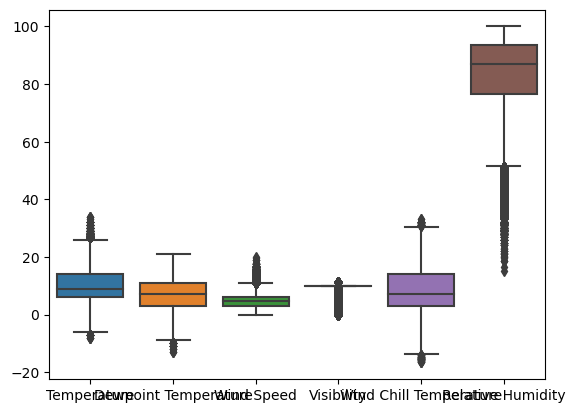

In [35]:
sns.boxplot(Meteorology_df[['Temperature', 'Dewpoint Temperature', 'Wind Speed','Visibility', 'Wind Chill Temperature', 'Relative Humidity']])

C:\Users\sylvia\AppData\Local\Temp\ipykernel_20780\650642274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Meteorology_df[['Relative Humidity']] = Meteorology_df[['Relative Humidity']].apply(remove_outliers)


<AxesSubplot: >

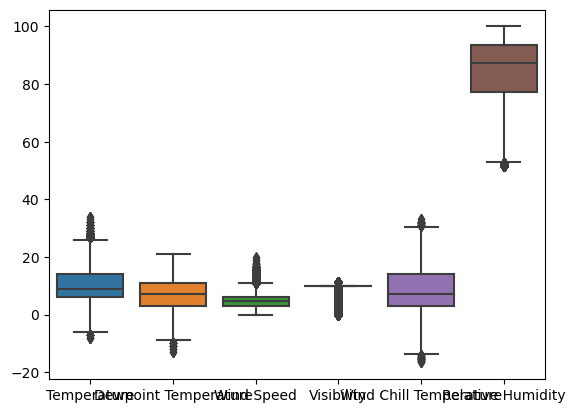

In [36]:
#The Humidity has significant outlier, delete
Meteorology_df[['Relative Humidity']] = Meteorology_df[['Relative Humidity']].apply(remove_outliers)
sns.boxplot(Meteorology_df[['Temperature', 'Dewpoint Temperature', 'Wind Speed','Visibility', 'Wind Chill Temperature', 'Relative Humidity']])

# Clean Tree data.

In [37]:
tree = pd.read_csv("tree-planting-locations.csv", delimiter=';')

tree['Date'] = tree['Feature start date'].apply(lambda x: x.split('+')[0])
tree['Year'] = pd.to_datetime(tree['Date'],format='%Y-%m-%dT%H:%M:%S').dt.year
tree['Month'] = pd.to_datetime(tree['Date'],format='%Y-%m-%dT%H:%M:%S').dt.month
tree['Day'] = pd.to_datetime(tree['Date'],format='%Y-%m-%dT%H:%M:%S').dt.day
tree['Hour'] = pd.to_datetime(tree['Date'],format='%Y-%m-%dT%H:%M:%S').dt.hour


tree_df = tree[['Year', 'Month', 'Day', 'Hour', 'geo_point_2d', 'Site name','Latin name','Plot number']]
tree_df.head(5)

,Year,Month,Day,Hour,geo_point_2d,Site name,Latin name,Plot number
0,2017,8,8,3,"51.496112976681, -2.671314279945971",Bangrove Walk Amenity Land,Liriodendron tulipifera,200013.5
1,2019,9,26,3,"51.49109301287853, -2.663128971955957",Shirehampton Park,Acer campestre,200001.5
2,2017,10,23,3,"51.47769804124667, -2.646878977336136",Sabrina Way,Sorbus a 'Cardinal Royal',200005.5
3,2020,10,8,3,"51.47564706553951, -2.520124020216623",Hillfields Park,Betula pendula,200015.5
4,2020,8,7,3,"51.475867914271525, -2.545042016053264",Thingwall Park,Tilia cordata Greenspire,200022.5


In [38]:
tree['Latin name'].unique()

array(['Liriodendron tulipifera', 'Acer campestre',
       "Sorbus a 'Cardinal Royal'", 'Betula pendula',
       'Tilia cordata Greenspire', 'Alnus incana Laciniata',
       'Betula albosinensis fascinatio', 'Betula pendula Edinburgh',
       'Taxodium distichum', 'Malus trilobata', 'Tilia cordata',
       'Prunus Snow Goose', 'Malus tschonoskii',
       'Broussonetia papyrifera', "Acer campestre 'Will Cladwell'",
       "Acer x freemanii 'Armstrong'", 'Malus hupehensis',
       'Populus nigra', 'Davidia involucrata', 'Betula ermanii',
       'Amelanchier arborea Robin Hill', 'Acer platanoides',
       'Magnolia Galaxy', 'Liriodendron tulipifera Fastig',
       'Crataegus x persimilis Prunifo', 'Betula pendula Fastigiata',
       'Malus floribunda', 'Sophora japonica', 'Koelreuteria paniculata',
       'Styrax japonica', 'Pinus sylvestris', 'Pinus pinaster',
       "Sorbus aucuparia 'Streetwise'", 'Cladrastis lutea',
       'Nothofagus dombeyi', 'Pyrus calleryana Chanticleer',
       '

In [39]:
print(tree_df.shape)
tree_df.isna().sum()
#tree_df = tree_df.dropna()

(826, 8)


Year            0
Month           0
Day             0
Hour            0
geo_point_2d    0
Site name       0
Latin name      0
Plot number     0
dtype: int64

# Clean Covid data.

In [40]:
covid_19_cases = pd.read_csv("covid-19-cases.csv", delimiter=';')
covid_19_cases.head(5)

,Area name,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate,geo_shape,geo_point_2d
0,North Somerset,2021-06-29,98,10966,5099.2,"{""coordinates"": [[[-2.7276908, 51.4997823], [-...","51.3892298341, -2.80066579483"
1,Bath and North East Somerset,2021-07-01,81,9315,4819.4,"{""coordinates"": [[[-2.3428993, 51.4393887], [-...","51.3559707863, -2.47520121048"
2,South Gloucestershire,2021-07-01,116,16893,5925.4,"{""coordinates"": [[[-2.5090178, 51.6660602], [-...","51.5468677188, -2.47061248413"
3,England,2021-06-28,22838,4171798,7411.7,"{""coordinates"": [-1.647762, 52.438655], ""type""...","52.438655, -1.647762"
4,North Somerset,2021-07-05,85,11479,5337.8,"{""coordinates"": [[[-2.7276908, 51.4997823], [-...","51.3892298341, -2.80066579483"


In [41]:
covid_19_cases['Year'] = pd.to_datetime(covid_19_cases['Specimen date'],format='%Y-%m-%d').dt.year
covid_19_cases['Month'] = pd.to_datetime(covid_19_cases['Specimen date'],format='%Y-%m-%d').dt.month
covid_19_cases['Day'] = pd.to_datetime(covid_19_cases['Specimen date'],format='%Y-%m-%d').dt.day

In [42]:
covid_19_cases = covid_19_cases[['Year', 'Month','Day', 'geo_point_2d', 'Area name', 'Daily lab-confirmed cases', 'Cumulative lab-confirmed cases', 'Cumulative lab-confirmed cases rate']]
covid_19_cases.head(5)

,Year,Month,Day,geo_point_2d,Area name,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
0,2021,6,29,"51.3892298341, -2.80066579483",North Somerset,98,10966,5099.2
1,2021,7,1,"51.3559707863, -2.47520121048",Bath and North East Somerset,81,9315,4819.4
2,2021,7,1,"51.5468677188, -2.47061248413",South Gloucestershire,116,16893,5925.4
3,2021,6,28,"52.438655, -1.647762",England,22838,4171798,7411.7
4,2021,7,5,"51.3892298341, -2.80066579483",North Somerset,85,11479,5337.8


(3664, 8)


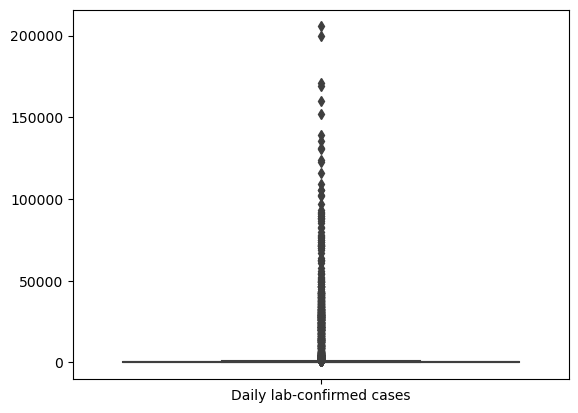

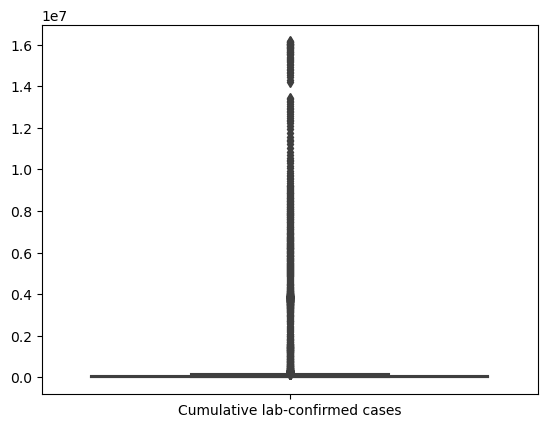

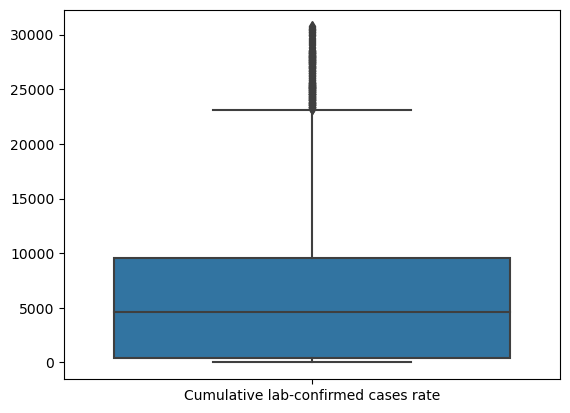

In [43]:
print(covid_19_cases.shape)
covid_19_cases.isna().sum()
covid_19_cases = covid_19_cases.dropna()
plt.show(sns.boxplot(covid_19_cases[['Daily lab-confirmed cases']]))
plt.show(sns.boxplot(covid_19_cases[[ 'Cumulative lab-confirmed cases']]))
plt.show(sns.boxplot(covid_19_cases[[ 'Cumulative lab-confirmed cases rate']]))

In [44]:
covid_19_deaths = pd.read_csv("covid-19-deaths.csv", delimiter=';')
covid_19_deaths['Year'] = pd.to_datetime(covid_19_deaths['Week ending on'],format='%Y-%m-%d').dt.year
covid_19_deaths['Month'] = pd.to_datetime(covid_19_deaths['Week ending on'],format='%Y-%m-%d').dt.month
covid_19_deaths['Day'] = pd.to_datetime(covid_19_deaths['Week ending on'],format='%Y-%m-%d').dt.day
covid_19_deaths.head(5)

,Area name,Week number,Week ending on,Place of death,Number of deaths,geo_shape,geo_point_2d,Year,Month,Day
0,North Somerset,25,2021-06-18,Elsewhere,0,"{""coordinates"": [[[-2.7276908, 51.4997823], [-...","51.3892298341, -2.80066579483",2021.0,6.0,18.0
1,"Bristol, City of",25,2021-06-18,Other communal establishment,0,"{""coordinates"": [[[-2.6731354, 51.5439573], [-...","51.4526512763, -2.77058732221",2021.0,6.0,18.0
2,"Bristol, City of",24,2021-06-11,Hospice,0,"{""coordinates"": [[[-2.6731354, 51.5439573], [-...","51.4526512763, -2.77058732221",2021.0,6.0,11.0
3,North Somerset,25,2021-06-18,Home,0,"{""coordinates"": [[[-2.7276908, 51.4997823], [-...","51.3892298341, -2.80066579483",2021.0,6.0,18.0
4,Bath and North East Somerset,25,2021-06-18,Other communal establishment,0,"{""coordinates"": [[[-2.3428993, 51.4393887], [-...","51.3559707863, -2.47520121048",2021.0,6.0,18.0


In [45]:
covid_19_deaths = covid_19_deaths[['Year', 'Month', 'Day','geo_point_2d', 'Area name', 'Number of deaths']]
covid_19_deaths.head(5)

,Year,Month,Day,geo_point_2d,Area name,Number of deaths
0,2021.0,6.0,18.0,"51.3892298341, -2.80066579483",North Somerset,0
1,2021.0,6.0,18.0,"51.4526512763, -2.77058732221","Bristol, City of",0
2,2021.0,6.0,11.0,"51.4526512763, -2.77058732221","Bristol, City of",0
3,2021.0,6.0,18.0,"51.3892298341, -2.80066579483",North Somerset,0
4,2021.0,6.0,18.0,"51.3559707863, -2.47520121048",Bath and North East Somerset,0


(1322, 6)


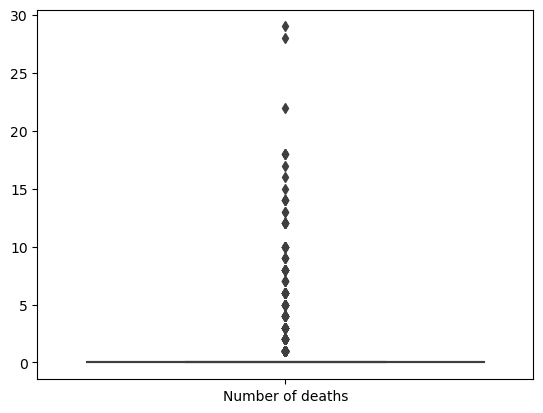

In [46]:
print(covid_19_deaths.shape)
covid_19_deaths.isna().sum()
covid_19_deaths = covid_19_deaths.dropna()
plt.show(sns.boxplot(covid_19_deaths[['Number of deaths']]))

In [47]:
covid_19_vaccinations = pd.read_csv("covid-19-vaccinations.csv", delimiter=';')
covid_19_vaccinations['Year'] = pd.to_datetime(covid_19_vaccinations['Vaccination date'],format='%Y-%m-%d').dt.year
covid_19_vaccinations['Month'] = pd.to_datetime(covid_19_vaccinations['Vaccination date'],format='%Y-%m-%d').dt.month
covid_19_vaccinations['Day'] = pd.to_datetime(covid_19_vaccinations['Vaccination date'],format='%Y-%m-%d').dt.day
covid_19_vaccinations=covid_19_vaccinations[['Year','Month','Day','geo_point_2d','Age group','Cumulative first dose vaccinations','Cumulative second dose vaccinations']]
covid_19_vaccinations.head(5)

,Year,Month,Day,geo_point_2d,Age group,Cumulative first dose vaccinations,Cumulative second dose vaccinations
0,2021,6,25,"51.5468677188, -2.47061248413",45_49,16930,10154
1,2021,6,25,"51.5468677188, -2.47061248413",85_89,4754,4681
2,2021,6,23,"51.5468677188, -2.47061248413",75_79,11178,11079
3,2021,6,27,"51.5468677188, -2.47061248413",18_24,13928,4237
4,2021,6,27,"51.5468677188, -2.47061248413",40_44,16299,7589


# Clean Journey data.

In [48]:
journey = pd.read_csv('fact-journey-hourly.csv', delimiter=';')
journey.head(5)

,Journey Link ID,Date Time,Total Matches,Speed,Journey Time,Journey Link,Journey Start,Journey Start Direction,Journey End,Journey End Direction
0,118,2020-07-19T05:00:00+01:00,NaN,NaN,NaN,St Luke's Rd SB > Parson St Gyratory,St Luke's Rd,South bound,Parson St Gyratory,None
1,118,2020-07-19T23:00:00+01:00,NaN,NaN,NaN,St Luke's Rd SB > Parson St Gyratory,St Luke's Rd,South bound,Parson St Gyratory,None
2,118,2020-07-20T06:00:00+01:00,NaN,NaN,NaN,St Luke's Rd SB > Parson St Gyratory,St Luke's Rd,South bound,Parson St Gyratory,None
3,118,2020-07-20T07:00:00+01:00,NaN,NaN,NaN,St Luke's Rd SB > Parson St Gyratory,St Luke's Rd,South bound,Parson St Gyratory,None
4,132,2020-07-17T10:00:00+01:00,NaN,NaN,NaN,Avon St OB > Easton Way NB,Avon St,Outbound,Easton Way,North bound


In [49]:
journey['Date'] = journey['Date Time'].apply(lambda x: x.split('+')[0])
journey['Year'] = pd.to_datetime(journey['Date'],format='%Y-%m-%dT%H:%M:%S').dt.year
journey['Month'] = pd.to_datetime(journey['Date'],format='%Y-%m-%dT%H:%M:%S').dt.month
journey['Day'] = pd.to_datetime(journey['Date'],format='%Y-%m-%dT%H:%M:%S').dt.day
journey['Hour'] = pd.to_datetime(journey['Date'],format='%Y-%m-%dT%H:%M:%S').dt.hour

journey = journey[['Year', 'Month', 'Day', 'Hour', 'Total Matches', 'Journey Time']]
journey.head(5)

,Year,Month,Day,Hour,Total Matches,Journey Time
0,2020,7,19,5,NaN,NaN
1,2020,7,19,23,NaN,NaN
2,2020,7,20,6,NaN,NaN
3,2020,7,20,7,NaN,NaN
4,2020,7,17,10,NaN,NaN


In [50]:
print(journey.shape)
journey.isna().sum()

(3279707, 6)


Year                 0
Month                0
Day                  0
Hour                 0
Total Matches    10475
Journey Time     10475
dtype: int64

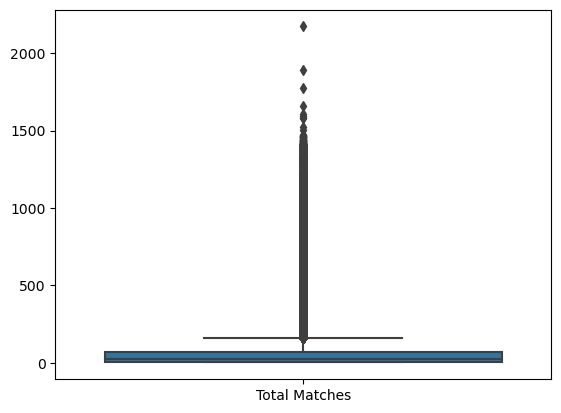

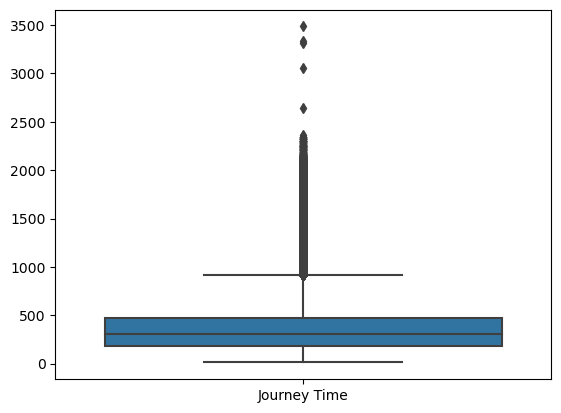

In [51]:
plt.show(sns.boxplot(journey[['Total Matches']]))
plt.show(sns.boxplot(journey[[ 'Journey Time']]))

# Clean Solar data.

In [52]:
solar = pd.read_csv('solar-potential.csv', delimiter=';')
solar.head(5)

,OBJECTID,"Insolation, kWh/m2 per yr",Unshaded roof area (m2),PV generation (kWh/yr),PV emission savings (kg CO2/yr),PV system size (kWp),Suitability,geo_shape,geo_point_2d
0,86655,980.7895,40.1878,3547.4185,1926.2482,5.7411,well suitable,"{""coordinates"": [[[-2.7006225668678545, 51.500...","51.50089140748006, -2.700523133319994"
1,86659,950.0000,11.7728,1006.5707,546.5679,1.6818,well suitable,"{""coordinates"": [[[-2.7006537356512057, 51.502...","51.50216121553671, -2.7007004078201047"
2,86660,967.3846,11.8331,1030.2413,559.4210,1.6904,well suitable,"{""coordinates"": [[[-2.697514685065753, 51.5017...","51.50178831337681, -2.6974788905402254"
3,86662,985.1429,35.6011,3156.4990,1713.9790,5.0859,well suitable,"{""coordinates"": [[[-2.6977067319744856, 51.501...","51.50124217288002, -2.6976874481325415"
4,86663,962.2222,10.2682,889.2233,482.8483,1.4669,well suitable,"{""coordinates"": [[[-2.7007194748023675, 51.502...","51.502220312577414, -2.700765367907451"


In [53]:
solar.shape

(158148, 9)

# Clean StreetLight data.

In [54]:
streetlights = pd.read_csv('streetlights-and-street-furniture.csv', delimiter=';')
streetlights.head(5)

,OBJECTID,Unit ID,Unit number,Location,USRN,Street,Easting,Northing,Column height,Column material,Unit type description,Position description,Owner description,Asset number,Column type,Account code,Fault maintenance support,Included on energy report,geo_shape,geo_point_2d
0,5,10097712,F005,Jim O Neil House,4556244,Kilminster Road,352752.63,177079.83,1.0,NaN,SL: Flood Light,NaN,N&HS - HOUSING,16401.09,NaN,METERED,No,FALSE,"{""coordinates"": [-2.681912839214326, 51.490677...","51.49067799317618, -2.681912839214326"
1,8,10097683,F003,Wildcroft House,4531560,Wildcroft Road,357743.21,175954.45,NaN,NaN,SL: Flood Light,NaN,N&HS - HOUSING,16401.05,NaN,METERED,No,FALSE,"{""coordinates"": [-2.60990081589823, 51.4809559...","51.48095599056749, -2.60990081589823"
2,39,10099723,F002,Orlebar Gardens,4534750,Orlebar Gardens,354947.00,178672.00,NaN,NaN,SL: Flood Light,NaN,N&HS - HOUSING,16401.03,NaN,METERED,No,FALSE,"{""coordinates"": [-2.650512351817441, 51.505172...","51.50517264911767, -2.650512351817441"
3,70,150891,T027,N /Saville Rd-N (opP3),4540012,Stoke Hill,356640.61,175293.41,1.0,PLASTIC,SL: Bollard,Pedestrian Refuge,PTSD - HIGHWAYS,20812.00,GLASDON REBOUND,LXL102 T SIGNS,Yes,TRUE,"{""coordinates"": [-2.62569679155801, 51.4749289...","51.47492893825677, -2.62569679155801"
4,71,071941,T023,Access to TESCOs,4557003,Callington Road,361434.30,170292.60,1.0,ALUMINIUM,SL: Bollard,Traffic island,PTSD - HIGHWAYS,20813.00,SIMMONSIGNS GLOBAL,LXL102 T SIGNS,Yes,TRUE,"{""coordinates"": [-2.556129994818105, 51.430313...","51.43031364725714, -2.556129994818105"


In [55]:
streetlights.shape

(50143, 20)

# Clean Waste data.

In [56]:
waste = pd.read_csv('bristol-waste-data-annual.csv', delimiter=';')
waste

,Year,Residual household waste per household,Household waste sent for reuse recycling or composting,Municipal waste sent to landfill,Collected household waste per person,Bikes diverted to reuse,Bikes diverted to reuse.1,Mobility aids diverted to reuse,Mobility aids diverted to reuse (tonnes),Paint diverted to reuse,Furniture items diverted to reuse,Furniture items diverted to reuse (tonnes),Electrical items diverted to reuse,Electrical items diverted to reuse (tonnes),Charity organisations supported,Waste diverted into reuse
0,2014,487.5,43.0,29.2,380.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,462.9,44.0,19.9,362.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,492.0,43.0,28.0,377.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,503.8,41.0,38.7,367.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,NaN,NaN,NaN,NaN,1097.0,10.1,845.0,3.5,15.3,161.0,2.6,258.0,2.1,11.0,38.8
5,2016,498.5,43.0,27.7,380.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013,500.9,41.0,31.2,380.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,536.2,37.0,57.7,383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2012,458.7,45.0,25.8,374.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
waste.shape

(9, 16)

# Clean the ev_chargingg_points df

In [58]:
ev_charging_points = pd.read_csv('ev_charging_points.csv', delimiter=';')
ev_charging_points

,id,site_name,instruction_to_stop,last_status_update,county,postcode,power_output,host_notes,instruction_before_stop,tariff_unit,...,connector2_power_output,connector2_socket_type,connector3_last_update,connector3_status,connector3_power_output,connector3_socket_type,connector4_last_update,connector4_status,connector4_power_output,connector4_socket_type
0,2488,Tobacco Factory,Please remove your cable,2020-04-24T16:49:52+01:00,NaN,BS3 1TF,7000,NaN,Please ensure you are at the charge point befo...,min 100 max 100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6272,Southmead Hospital Bristol,NaN,2022-11-22T23:07:33+00:00,NaN,BS10 5NB,7000,For engineer visits please contact Estates dep...,NaN,per kWh rounded up min 150,...,7000.0,62196 Type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2487,Tobacco Factory,Please remove your cable,2022-08-03T11:51:00+01:00,NaN,BS3 1TF,7000,NaN,Please ensure you are at the charge point befo...,min 100 max 100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3666,Regent Arcade,NaN,2021-07-26T15:09:10+01:00,Cheltenham,GL50 1JZ,7000,NaN,NaN,min 100 max 100,...,7000.0,62196 Type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1410,Leigh Court Business Centre,NaN,2020-03-15T14:46:31+00:00,NaN,BS8 3RA,7000,NaN,NaN,min 100 max 100,...,7000.0,62196 Type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1808,The Mall,NaN,2023-02-22T16:16:16+00:00,NaN,BS34 5DG,50000,NaN,NaN,per kWh rounded up min 100,...,50000.0,Combined Charging System,2023-02-22T16:16:16.689Z,Out of service,43000.0,62196 Type 2,NaN,NaN,NaN,NaN
6,2344,Bradley Stoke Leisure Centre,NaN,2021-09-24T12:38:49+01:00,Avon,BS32 9BS,50000,NaN,NaN,per kWh rounded up min 150,...,50000.0,Combined Charging System,2021-09-25T12:50:03.000Z,Unknown,43000.0,62196 Type 2,NaN,NaN,NaN,NaN
7,2343,Longwell Green Leisure Centre,NaN,2023-02-22T16:16:16+00:00,NaN,BS15 9LA,50000,NaN,NaN,per kWh rounded up min 150,...,50000.0,Combined Charging System,2023-02-22T16:16:16.725Z,Out of service,43000.0,62196 Type 2,NaN,NaN,NaN,NaN
8,3648,City of Bristol College - Ashley Down Centre,Please remove your cable,2023-02-20T09:53:20+00:00,NaN,BS7 9BU,7000,NaN,Please ensure you are at the charge point befo...,hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3649,City of Bristol College - Ashley Down Centre,Please remove your cable,2023-02-22T07:59:02+00:00,NaN,BS7 9BU,7000,NaN,Please ensure you are at the charge point befo...,hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
ev_charging_points['Date'] = ev_charging_points['last_status_update'].apply(lambda x: x.split('+')[0])
ev_charging_points['Year'] = pd.to_datetime(ev_charging_points['Date'],format='%Y-%m-%dT%H:%M:%S').dt.year
ev_charging_points['Month'] = pd.to_datetime(ev_charging_points['Date'],format='%Y-%m-%dT%H:%M:%S').dt.month
ev_charging_points['Day'] = pd.to_datetime(ev_charging_points['Date'],format='%Y-%m-%dT%H:%M:%S').dt.day
ev_charging_points['Hour'] = pd.to_datetime(ev_charging_points['Date'],format='%Y-%m-%dT%H:%M:%S').dt.hour

In [60]:
ev_charging_points_df = ev_charging_points[['Year','Month','Day','Hour','postcode','id','power_output']]
print(ev_charging_points_df.shape)
ev_charging_points_df.head(5)

(26, 7)


,Year,Month,Day,Hour,postcode,id,power_output
0,2020,4,24,16,BS3 1TF,2488,7000
1,2022,11,22,23,BS10 5NB,6272,7000
2,2022,8,3,11,BS3 1TF,2487,7000
3,2021,7,26,15,GL50 1JZ,3666,7000
4,2020,3,15,14,BS8 3RA,1410,7000


output data

In [61]:
file='D:/学习资料/DataScience/TB2/Mini-project/process_data/X_variables/X_output/'
#1. with Y, M, D, H, and  Zipcode
tree_df.to_csv(file+'tree_df.csv', index=False) 
ev_charging_points_df.to_csv(file+'ev_charging_points_df.csv', index=False) 
covid_19_cases.to_csv(file+'covid_19_cases.csv', index=False)
#2. with Y, M, D, H
Meteorology_df.to_csv(file+'Meteorology_df.csv', index=False)
#4. with Y,M,D,H
journey.to_csv(file+'journey.csv', index=False)
covid_19_vaccinations.to_csv(file+'covid_19_vaccinations.csv', index=False)
covid_19_deaths.to_csv(file+'covid_19_vaccinations.csv', index=False)

Join the datasetswith Y, M, D, H, and  Zipcode

In [62]:
join_x_df = tree_df.merge(ev_charging_points_df,on=['Year','Month','Day','Hour'],how='left')# add zip code of tree and then merge
# todo: merge mcovid_19_cases and traffic datasets

In [63]:
join_x_df.head(5)

,Year,Month,Day,Hour,geo_point_2d,Site name,Latin name,Plot number,postcode,id,power_output
0,2017,8,8,3,"51.496112976681, -2.671314279945971",Bangrove Walk Amenity Land,Liriodendron tulipifera,200013.5,NaN,NaN,NaN
1,2019,9,26,3,"51.49109301287853, -2.663128971955957",Shirehampton Park,Acer campestre,200001.5,NaN,NaN,NaN
2,2017,10,23,3,"51.47769804124667, -2.646878977336136",Sabrina Way,Sorbus a 'Cardinal Royal',200005.5,NaN,NaN,NaN
3,2020,10,8,3,"51.47564706553951, -2.520124020216623",Hillfields Park,Betula pendula,200015.5,NaN,NaN,NaN
4,2020,8,7,3,"51.475867914271525, -2.545042016053264",Thingwall Park,Tilia cordata Greenspire,200022.5,NaN,NaN,NaN


In [64]:
tree_df.head(5)

,Year,Month,Day,Hour,geo_point_2d,Site name,Latin name,Plot number
0,2017,8,8,3,"51.496112976681, -2.671314279945971",Bangrove Walk Amenity Land,Liriodendron tulipifera,200013.5
1,2019,9,26,3,"51.49109301287853, -2.663128971955957",Shirehampton Park,Acer campestre,200001.5
2,2017,10,23,3,"51.47769804124667, -2.646878977336136",Sabrina Way,Sorbus a 'Cardinal Royal',200005.5
3,2020,10,8,3,"51.47564706553951, -2.520124020216623",Hillfields Park,Betula pendula,200015.5
4,2020,8,7,3,"51.475867914271525, -2.545042016053264",Thingwall Park,Tilia cordata Greenspire,200022.5


In [65]:
ev_charging_points_df.head(5)

,Year,Month,Day,Hour,postcode,id,power_output
0,2020,4,24,16,BS3 1TF,2488,7000
1,2022,11,22,23,BS10 5NB,6272,7000
2,2022,8,3,11,BS3 1TF,2487,7000
3,2021,7,26,15,GL50 1JZ,3666,7000
4,2020,3,15,14,BS8 3RA,1410,7000


In [66]:
file='D:/学习资料/DataScience/TB2/Mini-project/process_data/X_variables/X_output/'
tree_df.to_csv(file+'tree_new_df.csv', index=False)